In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path_sales = r'D:\作品集\coffee\Coffee shop sample data (11.1.3+)\201904 sales reciepts.csv'
file_path_product = r'D:\作品集\coffee\Coffee shop sample data (11.1.3+)\product.csv'

In [3]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# 讀資料
datas = pd.read_csv(file_path_sales)
product = pd.read_csv(file_path_product)

In [4]:
#合併資料 data and product品項
result1=pd.merge(datas, product, 
          how='left', on=['product_id'])

In [5]:
#檢查數據 #確認沒有空值 
result1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           49894 non-null  int64  
 1   transaction_date         49894 non-null  object 
 2   transaction_time         49894 non-null  object 
 3   sales_outlet_id          49894 non-null  int64  
 4   staff_id                 49894 non-null  int64  
 5   customer_id              49894 non-null  int64  
 6   instore_yn               49894 non-null  object 
 7   order                    49894 non-null  int64  
 8   line_item_id             49894 non-null  int64  
 9   product_id               49894 non-null  int64  
 10  quantity                 49894 non-null  int64  
 11  line_item_amount         49894 non-null  float64
 12  unit_price               49894 non-null  float64
 13  promo_item_yn            49894 non-null  object 
 14  product_group         

In [6]:
'''
咖啡品項
大家最常買那些品項?
品項的SIZE?
'''

#整理成新的table
temp1 = ['product','product_group','product_category','quantity','unit_price']
result2= result1[temp1]
fliter = (result2["product_category"] == "Coffee")
result2=result2[fliter]
result2['sale'] = result2['quantity'] * result2['unit_price'] 
grouped = result2.groupby('product').sum().reset_index()
grouped = grouped.sort_values(by='quantity', ascending=False) 
print("Grouped DataFrame:")
display(grouped)

Grouped DataFrame:


,product,product_group,product_category,quantity,unit_price,sale
15,Latte,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1531,3723.75,5741.25
10,Ethiopia Rg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1506,2934.00,4518.00
6,Columbian Medium Roast Rg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1502,2477.50,3755.00
11,Ethiopia Sm,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1492,2083.40,3282.40
16,Latte Rg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1489,4080.00,6328.25
1,Brazilian Rg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1477,2934.00,4431.00
18,Our Old Time Diner Blend Rg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1476,2430.00,3690.00
19,Our Old Time Diner Blend Sm,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1475,1940.00,2950.00
2,Brazilian Sm,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1465,2105.40,3223.00
12,Jamaican Coffee River Lg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1458,3652.50,5467.50


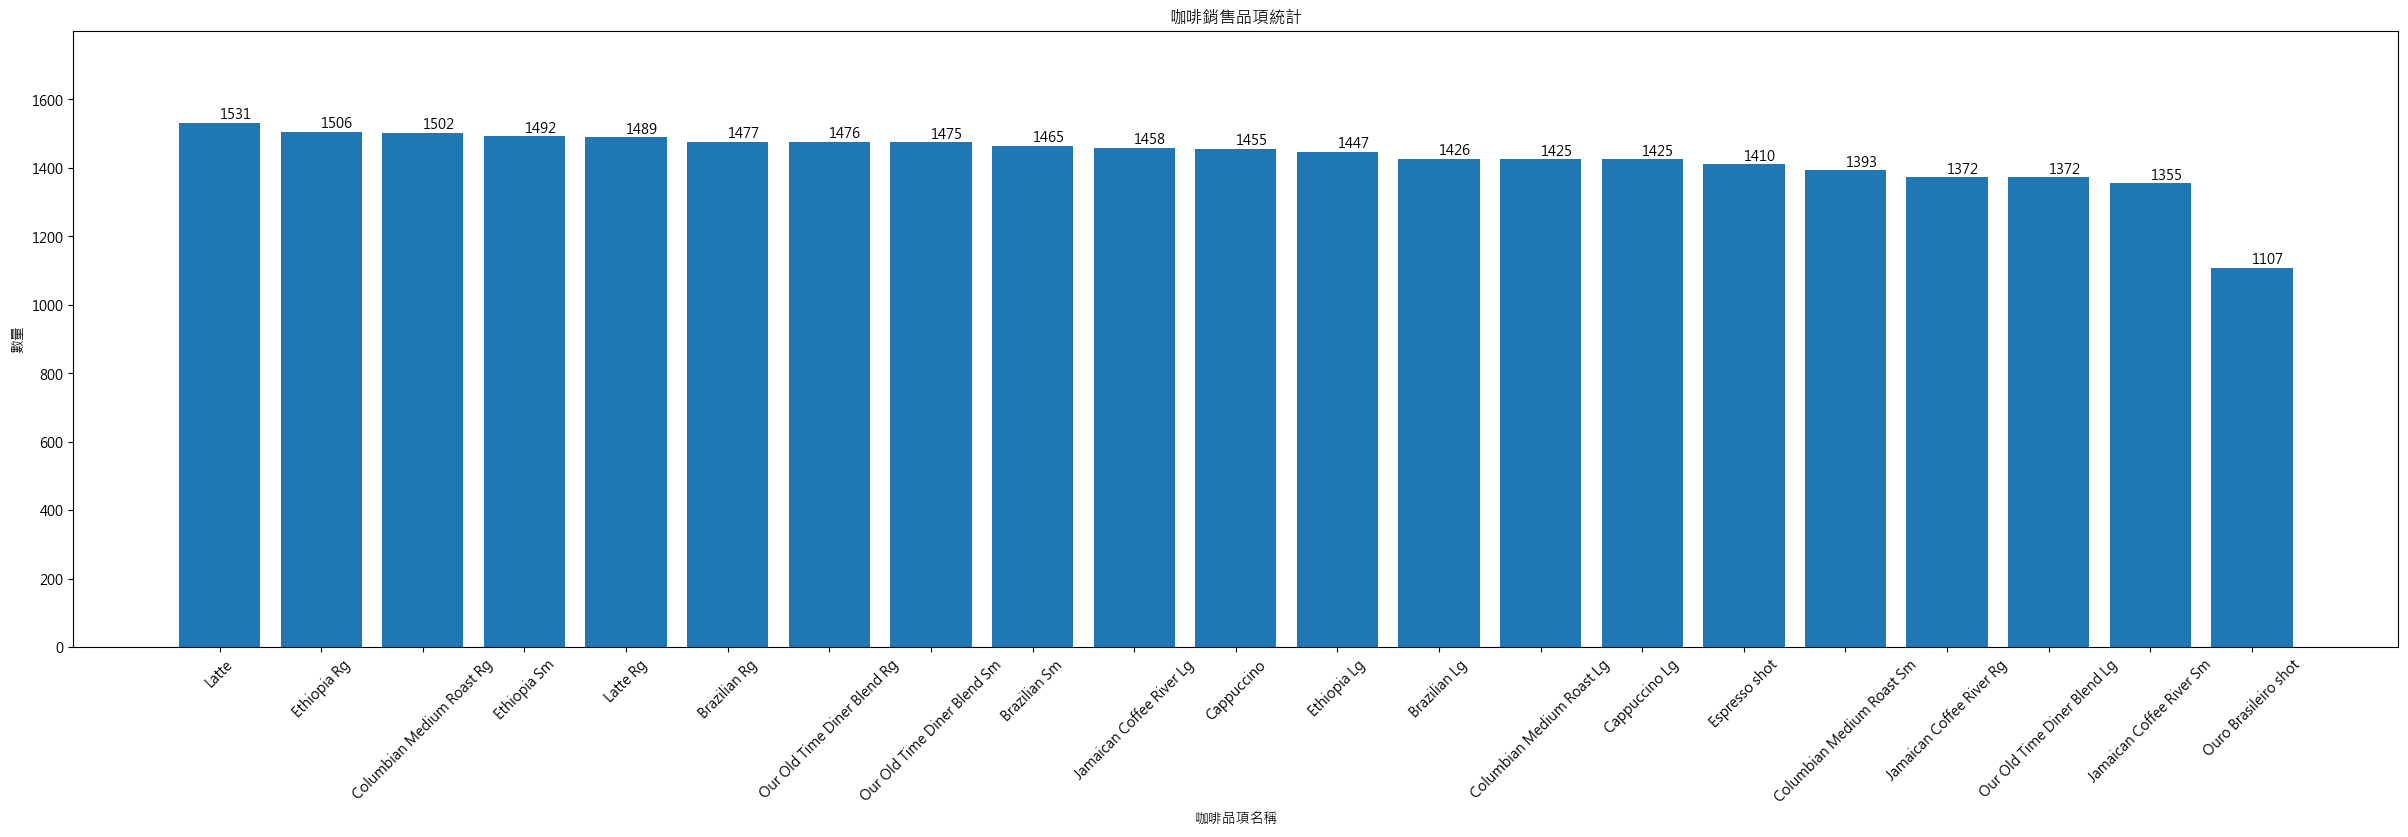

In [7]:
#畫圖
plt.figure(figsize=(30, 8))
bars=plt.bar(grouped['product'],grouped['quantity'])
plt.title('咖啡銷售品項統計')
plt.xlabel('咖啡品項名稱')
plt.ylabel('數量')
plt.ylim(0,1800) #設定y軸顯示範圍
#產生刻度陣列(npArray 類式list)
tick_arr = np.arange(0,1800,200)
plt.xticks(rotation=45) #設定刻度
plt.yticks(tick_arr) #空值代表隱藏刻度


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

plt.show()